In [1]:
# original to data tab file

In [2]:
import codecs as cd
import numpy as np
import pandas as pd
import tkinter as tk
import os
import matplotlib.pyplot as plt
import matplotlib.image as img

from scipy.optimize import nnls
from tkinter import ttk
from os import path

In [3]:
# Enter file name (.DAT)
file_name = "181029_N4e.dat"

# Select device
    # BELSORP: 0
    # JASCO Raman: 1
device_n = 0

# Export data as excel file: 1
set_ft = 1

# Export Data
# Adsorption branch (or not include separate data): "act_des" = 0
# Adsorption and Desorption branches: "act_des" = 1
act_des = 0

# Export pressure
#  - Absolute pressure: 0
#  - Relative pressure: 1
set_p = 1

In [4]:
# Setting for other devices
if device_n == 0:
    skip_n = 36
if device_n == 1:
    skip_n = 19

In [5]:
# Load log file
col_name = range(0,2)
rf = pd.read_csv(file_name, names=col_name, encoding='shift-jis')
fn_out = os.path.splitext(file_name)[0] #拡張子を除いたファイル名
rf.drop(1, axis=1, inplace=True)        # NaN列を削除（不要）

if device_n == 0:
#     print(rf.iloc[skip_n].str.split('\t')[0])
    if "No." in rf.iloc[skip_n].str.split('\t')[0]:
        skip_n += 1        
if device_n == 1:
    skip_n = 19

df_inf = rf[:skip_n]                    # 測定条件等
df = rf[skip_n:]                       # 数値データ
df.reset_index(inplace=True, drop=True)   #indexの振り直し
df_split = df[0].str.split('\t', expand=True)

if len(df_split.columns) == 6:
    df_split.drop(df_split.columns[5], axis=1, inplace=True) #index range[5]削除
    
    
# print(len(df_split.columns))                  #列数取得
# print(df_split)

In [6]:
# Separate data
i = 0
if device_n == 0:          # adsorption & desorption data
    for i in df_split.itertuples():
        if i[1] == "0":
            l = i[0]
            df_ad = df_split[:l]
            break

if device_n == 1:          # JASCO Raman
    for i in df_split.itertuples():
        if i[2] == "":       
            l = i[0]-1
            df_ad = df_split[:l-1]
            break

df_des = df_split[l-1:]
df_des = df_des.drop(df_des.index[1:6])

print(df_ad)
# print(df_des)

     0          1       2       3       4
0   16  3.7920E-6  104.01  34.172  3.1595
1   17  4.8409E-6  103.89  34.133  4.0077
2   18  5.2044E-6  103.85  34.119  4.3654
3   19  2.0453E-5  103.76  34.079  12.227
4   20  2.4971E-5  103.74  34.058  14.076
5   21  4.2858E-5  103.65  34.022  19.935
6   22  5.8326E-5  103.60  33.992  23.741
7   23  1.2876E-4  103.52  33.957  35.442
8   24  2.4869E-4  103.37  33.918  47.087
9   25  4.2534E-4  103.37  33.887  58.817
10  26  6.1664E-4  103.31  33.874  68.217
11  27  1.4169E-3  103.25  33.854  94.586
12  28  2.6684E-3  103.28  33.823  120.94
13  29  3.3172E-3  103.22  33.805  131.34
14  30  5.4154E-3  103.26  33.783  157.59
15  31  7.0189E-3  103.25  33.769  173.11
16  32  1.0457E-2  103.26  33.751  199.39
17  33  1.9159E-2  103.23  33.739  244.38
18  34  3.2201E-2  103.22  33.723  288.63
19  35  4.6914E-2  103.19  33.712  322.47
20  36  7.5839E-2  103.20  33.700  365.83
21  37  1.1312E-1  103.19  33.691  400.65
22  38  2.6410E-1  103.19  33.682 

In [7]:
# Set adsorption data

df_ad_out = pd.DataFrame(index=range(l), columns=range(2))


if device_n == 0:          # adsorption & desorption data
    i = 5
    for n in df_ad.index:
        for m in range(i):  
            if m == 1:
                pe = float(df_ad.iat[n,1])
                if set_p == 0:
                    df_ad_out.iat[n,0] = pe
            if m == 2 and set_p == 1:
                p0 = float(df_ad.iat[n,2])
                pp0 = pe / p0
                df_ad_out.iat[n,0] = pp0
            if m == 4:
                Vg = float(df_ad.iat[n,4])
                df_ad_out.iat[n,1] = Vg

if device_n == 1:  
    for n in df_ad.index:
        df_ad.iat[n,0] = round(float(df_ad.iat[n,0]),1)
#         print(df_ad.iat[n,1])
    df_ad_out = df_ad

print(df_ad_out)

           0       1
0        0.0  3.1595
1        0.0  4.0077
2        0.0  4.3654
3        0.0  12.227
4        0.0  14.076
5        0.0  19.935
6   0.000001  23.741
7   0.000001  35.442
8   0.000002  47.087
9   0.000004  58.817
10  0.000006  68.217
11  0.000014  94.586
12  0.000026  120.94
13  0.000032  131.34
14  0.000052  157.59
15  0.000068  173.11
16  0.000101  199.39
17  0.000186  244.38
18  0.000312  288.63
19  0.000455  322.47
20  0.000735  365.83
21  0.001096  400.65
22  0.002559  466.28
23   0.00455  503.36
24  0.007174  529.91
25  0.011021  554.05
26  0.041999  646.39
27  0.073691  713.34
28  0.103964   774.4
29  0.153284  871.59
30    0.2025  966.42
31  0.252044  1058.6
32  0.303719  1149.9
33  0.354079  1230.2
34  0.406046  1301.5
35  0.454394  1351.4
36   0.50741  1389.8
37   0.55245  1411.4
38   0.60488  1427.2
39  0.656946  1437.5
40  0.707782  1445.1
41  0.758349  1451.8
42  0.808441  1458.1
43   0.85888  1465.3
44  0.908192  1472.7
45  0.957061  1481.7
46    0.9788 

In [8]:
# Rearrange desorption data
df_des.reset_index(inplace=True, drop=True)   #indexの振り直し(desorption)
i = 0
for i in df_des.itertuples():
    if i[1] == "0":
        l = i[0]
        break
        
df_des = df_des[:l]
            
# print(df_des)

In [9]:
# Set desorption data

df_des_out = pd.DataFrame(index=range(l), columns=range(2))

if device_n == 0 and act_des == 1:
    for n in df_des.index:
        for m in range(5):
            if m == 1:
                pe = float(df_des.iat[n,1])
                if set_p == 0:
                    df_des_out.iat[n,0] = pe
            if m == 2 and set_p == 1:
                p0 = float(df_des.iat[n,2])
                pp0 = pe / p0
                df_des_out.iat[n,0] = pp0
            if m == 4:
                Vg = float(df_des.iat[n,4])
                df_des_out.iat[n,1] = Vg

if device_n == 1:
    df_des_out = df_des
# print(df_des)

In [10]:
# Save information file
df_inf.to_csv(path.join("results", (fn_out+'_inf.csv')), index=False, encoding='utf-8',sep='\t')

# Save data file
df_ad_out.to_csv(path.join("results", (fn_out+'_data.csv')), header=False, index=False, encoding='utf-8',sep='\t')
if set_ft == 1:
    df_ad_out.to_excel(path.join("results", (fn_out+'_data.xlsx')), index=False, header=None)
    
# Desorption branch
if device_n == 0 and act_des == 1:
    df_des_out.to_csv(path.join("results", (fn_out+'_data_de.csv')), header=False, index=False, encoding='utf-8',sep='\t')
    if set_ft == 1:
        df_des_out.to_excel(path.join("results", (fn_out+'_data_de.xlsx')), index=False, header=None)

# Raman
if device_n == 1:
    df_des_out.to_csv(path.join("results", (fn_out+'_info_2.csv')), header=False, index=False, encoding='utf-8',sep='\t')

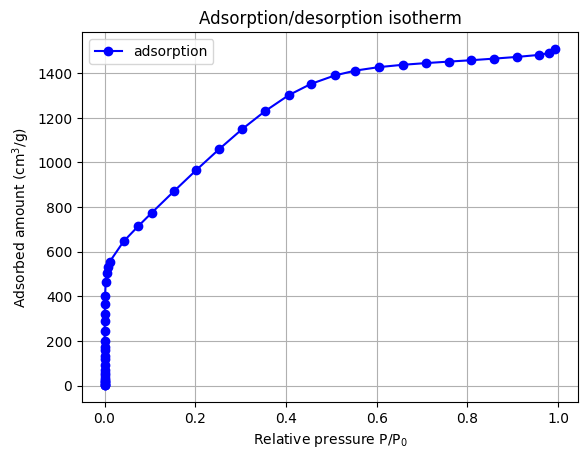

In [11]:
# Make graph of adsorption isotherm
if device_n == 0:
    x1 = df_ad_out[0]
    y1 = df_ad_out[1]

    # plot
    plt.plot(x1, y1, marker='o', linestyle='-', color='b', label='adsorption')  # adsorption branch
    if set_p == 0:
        plt.xlabel("Absolute pressure kPa$")
    if set_p == 1:
        plt.xlabel("Relative pressure P/P$_0$")
    plt.ylabel("Adsorbed amount (cm$^3$/g)")
    plt.title('Adsorption/desorption isotherm')
    plt.legend()
    plt.grid(True)

    # desorption branch
    if act_des == 1:
        x2 = df_des_out[0]
        y2 = df_des_out[1]
        plt.plot(x2, y2, marker='s', linestyle='--', color='r', label='desorption')  # desorption branch

    # Save plot
    plt.savefig(path.join("results", ('Adiso.png')))

    # Display plot
    plt.show()

In [12]:
# Make graph of Raman spectrum
if device_n == 1:
    fig, ax = plt.subplots() 
    # x: wavenumber, y: intensity
    x1 = df_ad_out[0]
    y1 = df_ad_out[1]
    max_y1 = round(float(df_ad_out[1].max()),1)
    min_y1 = round(float(df_ad_out[1].min()),1)
    print(str(min_y1) + "," + str(max_y1))

    # plot
    ax.plot(x1, y1, marker='o', linestyle='-', color='b')  
    ax.set_xlabel("Wavenumber cm$^-1$")
    ax.set_ylabel("Intensity")
    ax.set_title('Raman spectrum')
    ax.set_yticks([])
#     plt.ylim(min_y1*0.95, max_y1*1.05)
    ax.grid(True)
        
    # Save plot
    plt.savefig(path.join("results", ('Raman.png')))

    # Display plot
    plt.show()